In [153]:
#https://raw.githubusercontent.com/fivethirtyeight/data/master/bechdel/
import pandas as pd

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Drama                 44789
Comedy                38034
Action                27058
Thriller              25252
Adventure             22018
Romance               19340
Crime                 16274
Sci-Fi                15366
Fantasy               10658
Children               8681
Mystery                7631
Horror                 6795
Animation              6170
War                    5026
Musical                4722
IMAX                   3156
Western                1912
Documentary            1572
Film-Noir              1152
(no genres listed)       19
Name: count, dtype: int64
missing genres 0


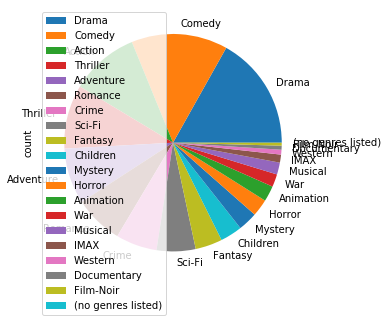

In [154]:
df_movie=pd.read_csv("https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/movies.csv", encoding = "ISO-8859-1")
df_ratings=pd.read_csv("https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/movie_ratings.csv",encoding = "ISO-8859-1")
#print(df_movie.shape)
#print(df_movie.columns)
#print(df_movie.head())
#print(df_ratings.head())

df=df_movie.merge(df_ratings,on="movieId", how="left")
df.set_index("movieId")
print(df.columns)

listCategories=[]
for row in df['genres']:
    categories=row.split('|')
    for category in categories:
        if (category in listCategories)==False:
            listCategories.append(category) 
 

for category in listCategories:
        mask=df["genres"].str.contains(category)
        df[category]=0
        df[category][mask]=1
        #print(mask)

#mask=df["genres"].str.contains('Comedy').any()
#print(df["genres"][mask])    
listCategoryCount=[]

for column in listCategories:
    listCategoryCount.append({'column':column, 'count':df[column].sum()})
    
dfCategory=pd.DataFrame(listCategoryCount,index=listCategories)

dfCategory=dfCategory.sort_values(by="count",ascending=False)
dfCategory.plot.pie(y='count', figsize=(5, 5))

print(dfCategory['count'])

print("missing genres",df['genres'].isnull().sum())


In [155]:
listRating=df.groupby(['movieId'])['rating'].mean()
listUserCount=df.groupby(['movieId'])['userId'].count()
listMovieId=df.groupby(['movieId'])['movieId'].unique()
listMovieTitle=df.groupby(['movieId'])['title'].unique()

dfPopularity=pd.DataFrame(columns=['movieId'])
dfPopularity.set_index('movieId')

for item in listMovieId:
    movieId=item[0]
    item_to_append=[movieId]
    #item_to_append=pd.Series([movieId,0,0], index = dfPopularity.columns)
    #print(item_to_append)
    #dfPopularity.append(item_to_append,ignore_index=True)
    dfPopularity.loc[len(dfPopularity)]=item_to_append


dfRating=pd.DataFrame(listRating)
dfPopularity=dfPopularity.merge(dfRating, on='movieId',how="left")

dfTitle=pd.DataFrame(listMovieTitle)
dfPopularity=dfPopularity.merge(dfTitle, on='movieId',how="left")

dfUserCount=pd.DataFrame(listUserCount)
dfPopularity=dfPopularity.merge(dfUserCount, on='movieId',how="left")

dfPopularity=dfPopularity.rename(columns={'userId':'user_count'})

print(dfPopularity.head())

#dfPopularity=pd.DataFrame({'rating':listRating,'count':listUserCount},index=listMovieId)

  movieId    rating                                 title  user_count
0       1  3.872470                    [Toy Story (1995)]         247
1       2  3.401869                      [Jumanji (1995)]         107
2       3  3.161017             [Grumpier Old Men (1995)]          59
3       4  2.384615            [Waiting to Exhale (1995)]          13
4       5  3.267857  [Father of the Bride Part II (1995)]          56


     movieId    rating                                              title  \
284      318  4.487138                 [Shawshank Redemption, The (1994)]   
48        50  4.370647                       [Usual Suspects, The (1995)]   
472      527  4.303279                          [Schindler's List (1993)]   
535      608  4.256696                                     [Fargo (1996)]   
266      296  4.256173                              [Pulp Fiction (1994)]   
2288    2858  4.236364                           [American Beauty (1999)]   
953     1196  4.232906  [Star Wars: Episode V - The Empire Strikes Bac...   
232      260  4.221649        [Star Wars: Episode IV - A New Hope (1977)]   
955     1198  4.193182  [Raiders of the Lost Ark (Indiana Jones and th...   
2062    2571  4.183398                               [Matrix, The (1999)]   

      user_count  
284          311  
48           201  
472          244  
535          224  
266          324  
2288         220  
953          234  


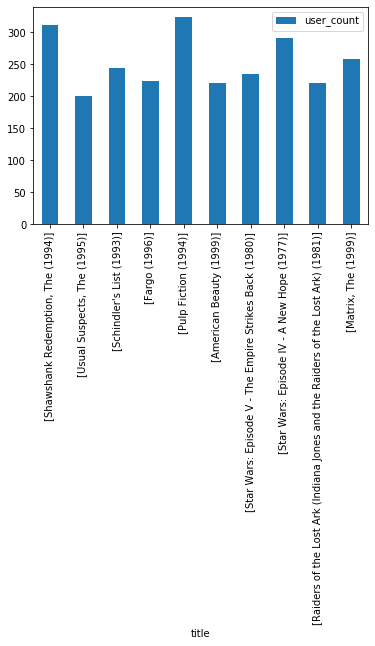

In [156]:
top10=dfPopularity[dfPopularity['user_count']>200].sort_values('rating',ascending=False).head(10)
print(top10)
top10.plot.bar(x="title",y='user_count')